<h3>(1) Data Description</h3>

Data from unique players and details from their play sessions were collected from a minecraft server. The data consists of two files:<br>
__a) players.csv__ contains 196 observations and 7 variables<br>
| Variable | Type | Meaning |
|----------|------|----------|
|experience| factor|Player Skill Level|
|subscribe| logical |Subscription status to the game-related newspaper|
|hashedEmail|character|Unique player ID|
|played_hours|double|Hours played in the server|
|name|character|Player name|
|gender|factor|Player's gender|
|Age|integer|Player age|

__Potential__ __Issues:__ 
1) The age of some players were not recorded resulting in a missing value (N/A) <br>
2) Most have players had minimal time with a few outliers having over 200 hours

__b) sessions.csv__ contains 1535 observations and 5 variables<br>

| Variable | Type | Meaning |
|----------|------|----------|
|hashedEmail| character|Unique player ID|
|start_time| character |Start day and time of session|
|end_time|character|End day and time of session|
|original_start_time|double|Original number used to calculate start_time|
|original_end_time|double|Original number used end_time|

__Potential__ __Issues:__ 
1) The dataset is not tidy <br>
2) The __original_start_time__ and __original_end_time__ may need to be removed<br>
3) The __start_time__ and __end_time__ column may need to be wrangled and separated



<h3>(2) Questions</h3>

__a) Broad__ __question:__ We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts</br>

__b) Specific__ __question:__ Can we predict the play time using a players age, subscription status and experience? <br>

__c) Variables:__

__*subscribe:*__ may indicate the level of engagement, affecting the play time. <br>
__*Age:*__ may indicate how much free time the players have to log on. <br>
__*experience:*__
may influence the amount of time the players spend practicing minecraft.<br>
__*played_hours:*__ Players who spend more time playing likely contribute more data.<br>
To wrangle the data, large outliers may need to be removed from the dataset, as it may dimish the effectiveness of the model and missing values will need to be either removed or accounted for.

<h3>(3) Exploratory Data Analysis and Visualization</h3>


In [1]:
#Loading Data Set into R
library(tidyverse)
players<-read_csv("https://raw.githubusercontent.com/andrewww166/planning_stage/main/players.csv")
sessions<-read_csv("https://raw.githubusercontent.com/andrewww166/planning_stage/main/sessions.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimite

In [2]:
#Computing Mean Values for Quantitative Variables
mean_players<-players|>
summarize(mean_played_hours=mean(played_hours), mean_age=mean(Age, na.rm=TRUE))
mean_players

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


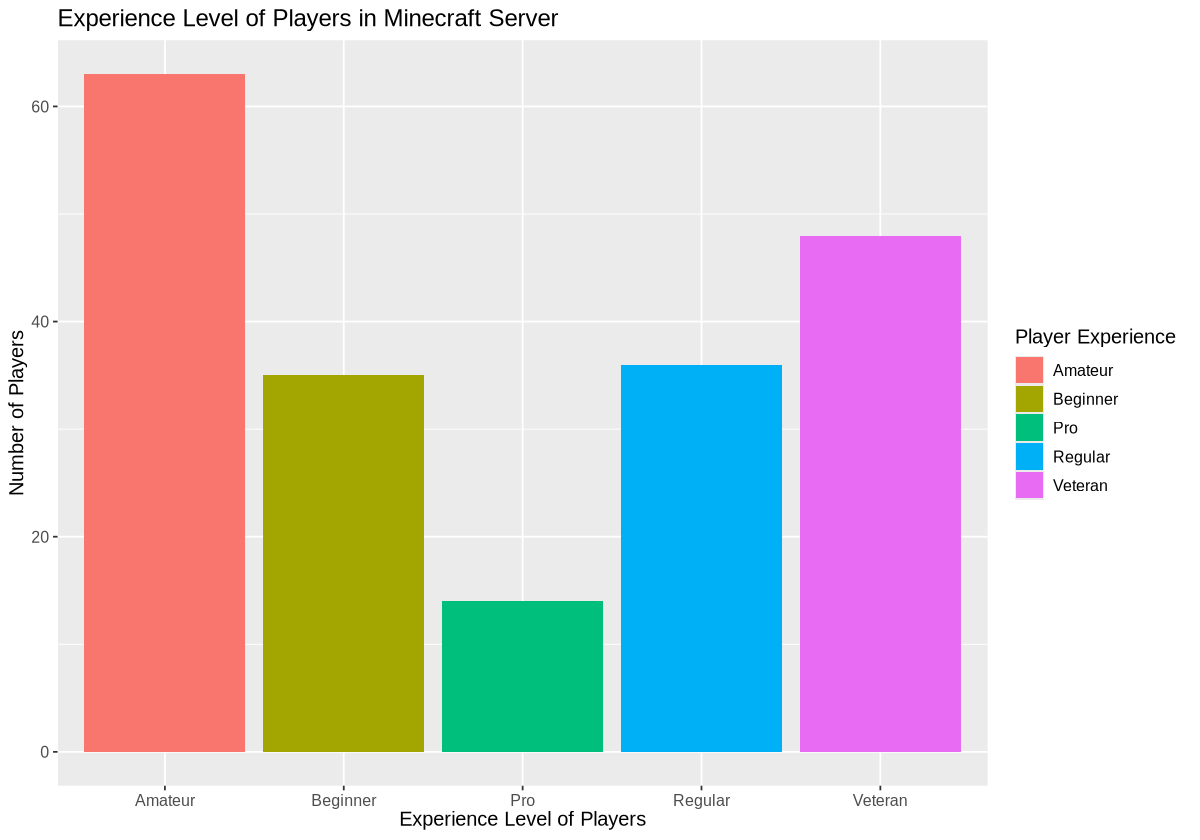

In [3]:
options(repr.plot.width = 10, repr.plot.height = 7)
experience_plot<-players|>
ggplot(aes(x=experience, fill=experience))+
geom_bar()+
labs(x="Experience Level of Players", 
    y= "Number of Players", 
    title="Experience Level of Players in Minecraft Server", 
    fill="Player Experience")+
theme(text=element_text(size=12))
experience_plot

The graph shows that most of the players are amateurs and there is representation in the data for all the player experience levels.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


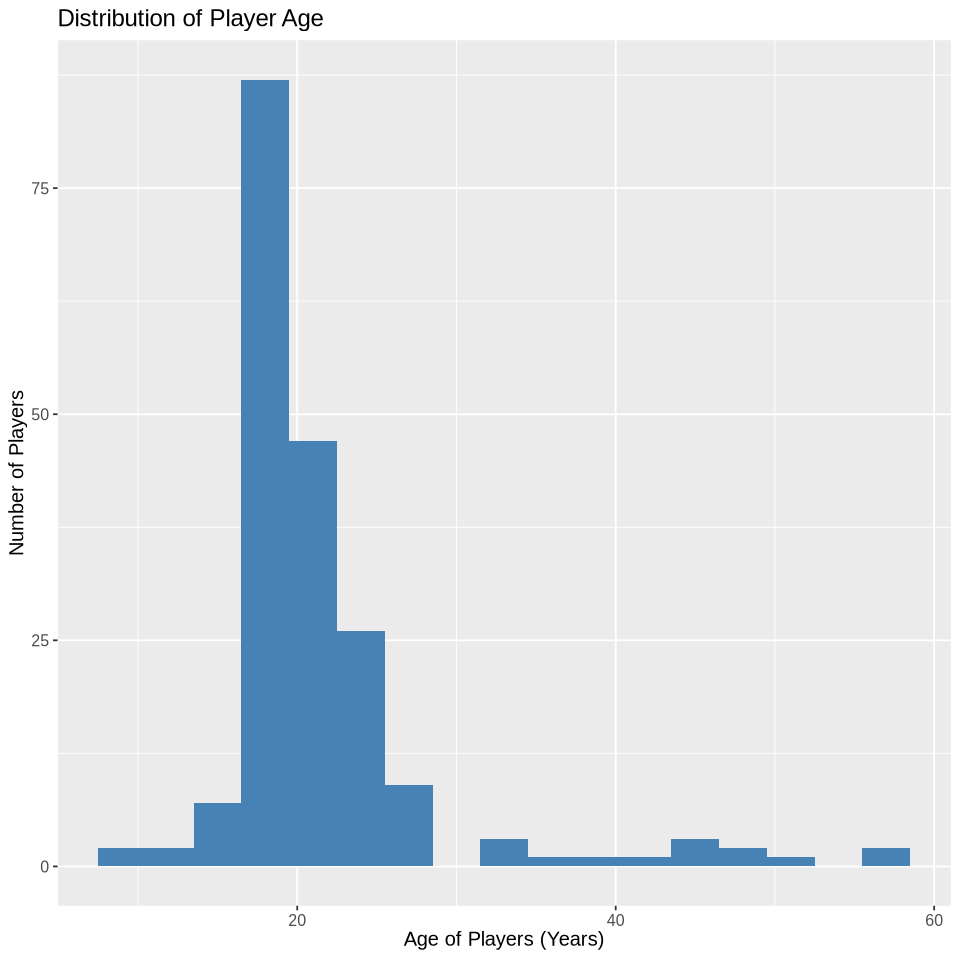

In [4]:
options(repr.plot.width = 8, repr.plot.height = 8)
age_plot<-players|>
ggplot(aes(x=Age))+
geom_histogram(binwidth= 3, fill="steelblue")+
labs(x="Age of Players (Years)", 
     y= "Number of Players", 
     title="Distribution of Player Age")+
    theme(text = element_text(size = 12))
age_plot

The graph provided more insight into the age of the players, where the majority of players were around 20 years old with ages ranging between about 5-60

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


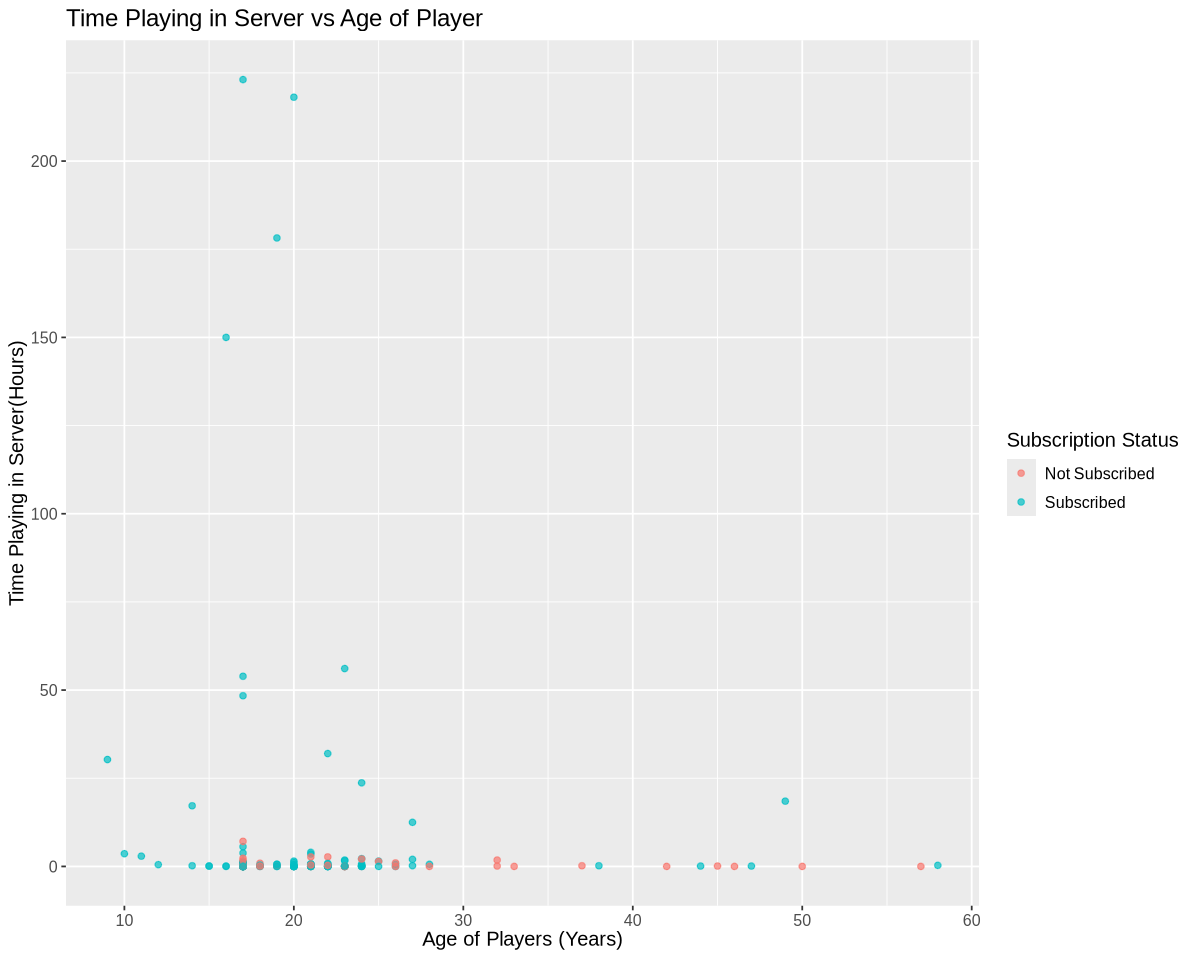

In [5]:
options(repr.plot.width = 10, repr.plot.height = 8)
age_time_plot<-players|>
mutate(subscribe=as.factor(subscribe),
    subscribe=fct_recode(subscribe, "Subscribed"="TRUE", "Not Subscribed"="FALSE"))|>
ggplot(aes(x=Age, y=played_hours, colour=subscribe))+
geom_point(alpha=0.7)+
labs(x="Age of Players (Years)", 
    y="Time Playing in Server(Hours)", 
    title="Time Playing in Server vs Age of Player", 
    colour="Subscription Status")+
theme(text=element_text(size=12))
age_time_plot

The graph shows that there is a non-linear trend between the age of the player and time spent in the server. Additionally, the colour showed that players who played over 25 hours were subscribed.

<h3>(4) Methods and Plan</h3>

__Method__<br>
Knn-regression would be appropriate to answer the question as we are predicting a numeric variable. The relationship appears to be non-linear from *Time Playing in the Server vs Age of the Player* graph, so knn was chosen over regression as it captures non-linear patterns. <br>
__Assumptions and Limitations__<br>
It will be assumed that the other variables (subscription status and experience level) are correlated with time playing in the server. Because we are including non-numeric variables, other methods may need to be used to implement experience and subscription into the model. Additionally, the variables would have to be scaled as knn is distance-based. Outliers in the dataset will also dimish the effectiveness of the model <br>
__Comparing and Selecting The Model__<br>
The models will be compared and selected using the number of neighbors to use __(k)__. The k-value which produces the smallest RMSE value will be selected. <br>
__Data Processing__
Player experience level could be used by assigning a number from 1-5 for each increasing player experience level, respectively. For subscription status, a dummy variable can be used as it is binary(0/1). All predictor variables will be scaled and the data will be split between 70% training and 30% testing sets. The training set will then be tuned using 5-fold cross validation to pick the k value which produces the lowest RMSE. The final model will then be evaluated using the test set to evaluate its accuracy.